# Main Results

## Import External Results

In [25]:
from pathlib import Path

results_root_dir = Path("/home/liam_priorlabs_ai/GIFT-Eval/results")

In [26]:
import pandas as pd
from tabpfn_time_series.experimental.visualization.data_processing import (
    load_external_results,
    get_common_subset
)   

# Load external results
all_df = load_external_results(root_dir=results_root_dir)


In [27]:
all_df.config_name.unique()

array(['timesfm_2_0_500m', 'TTM-R1-Zeroshot', 'TIDE', 'YingLong_6m',
       'Moirai_large', 'Timer', 'TimesFM', 'TFT', 'Crossformer',
       'Moirai_base', 'TiRex', 'TTM-R2-Zeroshot', 'Chronos_large',
       'chronos_bolt_small', 'YingLong_300m', 'iTransformer', 'N-BEATS',
       'YingLong_50m', 'Chronos_base', 'Seasonal_Naive', 'Auto_Arima',
       'TEMPO_ensemble', 'Lag-Llama', 'PatchTST', 'Chronos_small',
       'VisionTS', 'Auto_ETS', 'sundial_base_128m', 'Toto_Open_Base_1.0',
       'DLinear', 'Moirai_small', 'TTM-R2-Finetuned', 'DeepAR',
       'Auto_Theta', 'Naive', 'TabPFN-TS', 'chronos_bolt_base',
       'YingLong_110m'], dtype=object)

In [28]:
interested_models = [
    "TiRex",
    "Toto_Open_Base_1.0",
    "YingLong_300m",
    "TabPFN-TS",
    "chronos_bolt_base",
    "Seasonal_Naive",
]

df = all_df[all_df["config_name"].isin(interested_models)]

## Metrics

In [29]:
from tabpfn_time_series.experimental.visualization.metrics import (
    normalize_metric_by_baseline,
    gmean_and_ci,
    amean_and_ci,
    compute_ranking,
)

# Calculate rankings
rankings = compute_ranking(df, metric_column='wSQL_mean')

# Normalize metrics
normalized_mase_df = normalize_metric_by_baseline(df, metric='MASE_0.5', baseline_model='Seasonal_Naive')
normalized_wql_df = normalize_metric_by_baseline(df, metric='wSQL_mean', baseline_model='Seasonal_Naive')

# # Calculate geometric means and confidence intervals
# norm_wql_mean_and_ci = normalized_wql_df.groupby('config_name').apply(lambda x: gmean_and_ci(x['wSQL_mean']))
# norm_mase_mean_and_ci = normalized_mase_df.groupby('config_name').apply(lambda x: gmean_and_ci(x['MASE_0.5']))
# ranking_mean_and_ci = rankings.groupby('config_name').apply(lambda x: amean_and_ci(x['rank']))


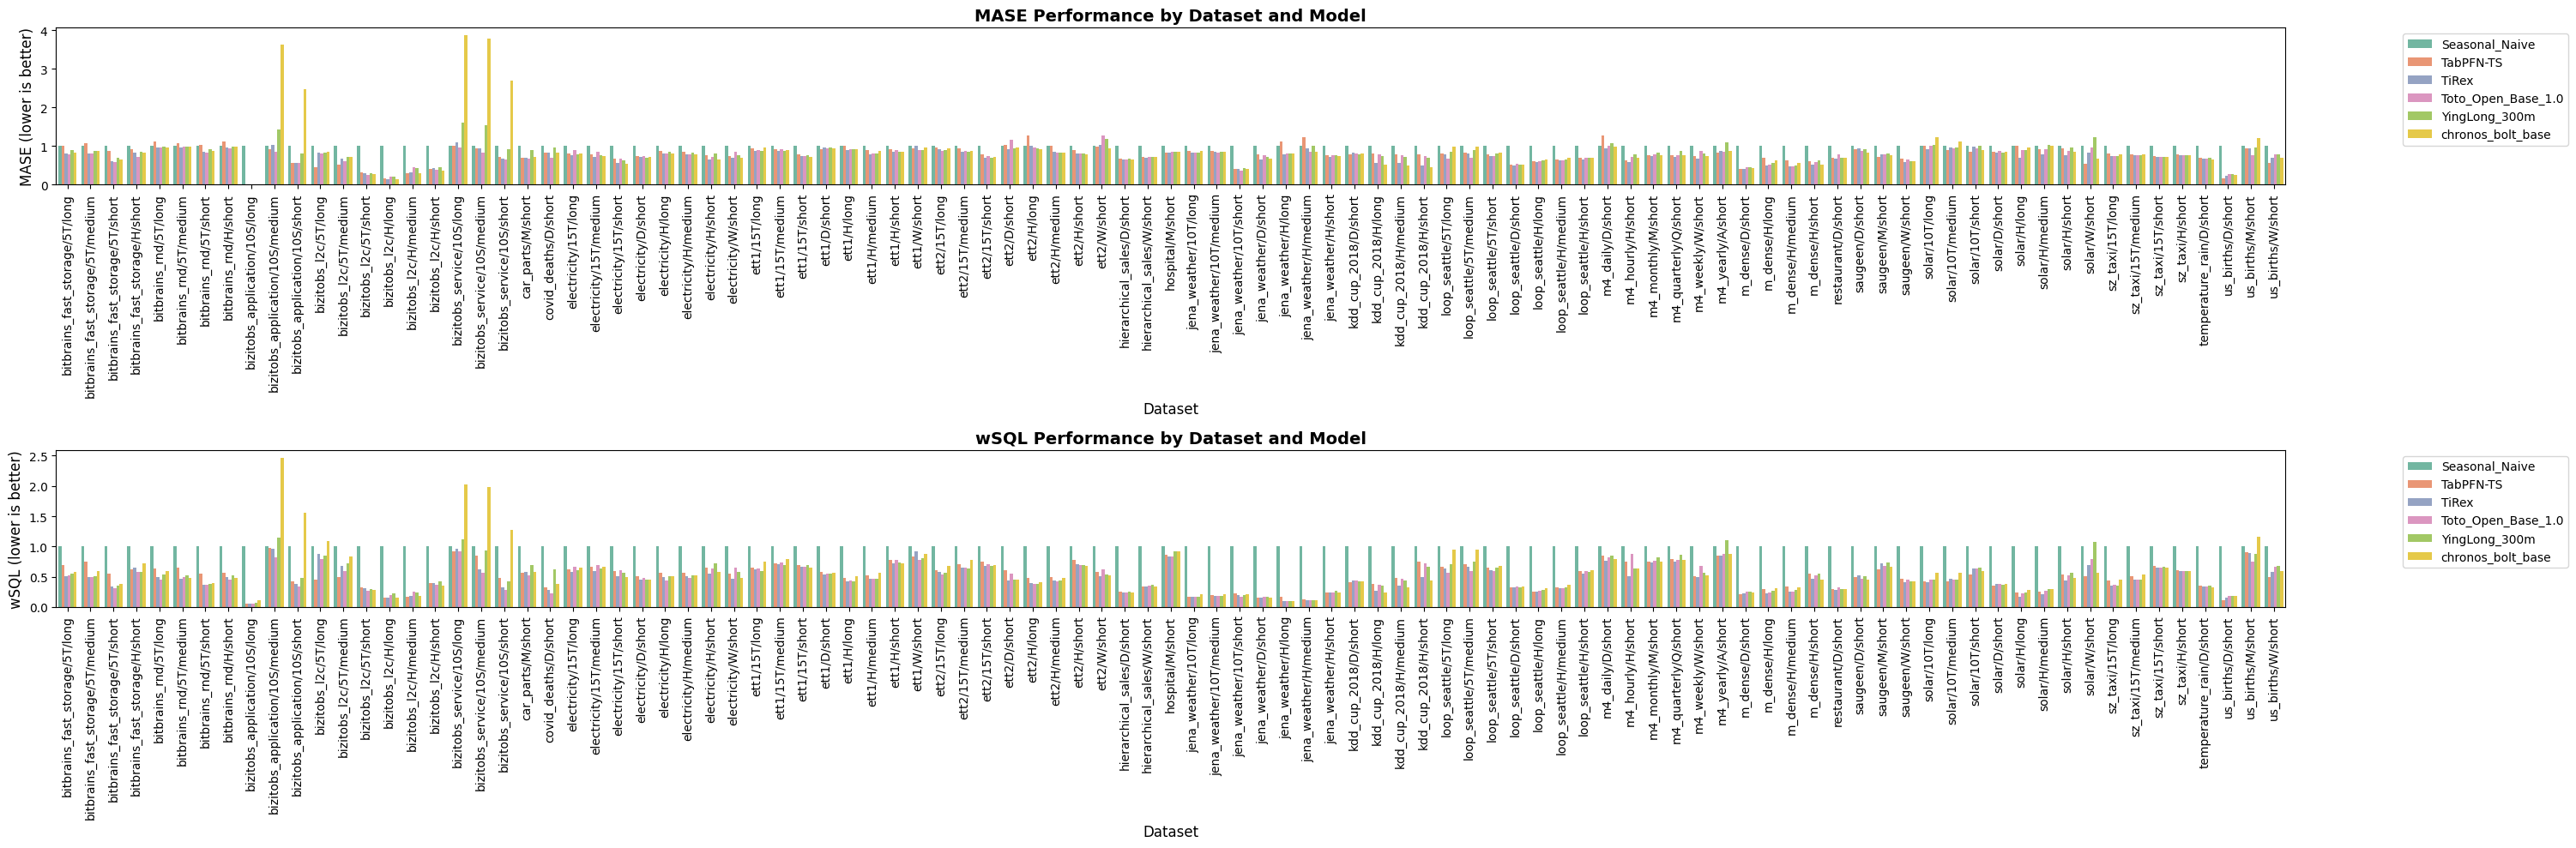

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create two subplots for MASE and wSQL metrics
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 10))

# Plot 1: MASE_0.5 by dataset and model
sns.barplot(
    data=normalized_mase_df,
    x='dataset_full_name',
    y='MASE_0.5',
    hue='config_name',
    ax=ax1,
    palette='Set2'
)
ax1.set_title('MASE Performance by Dataset and Model', fontsize=14, fontweight='bold')
ax1.set_xlabel('Dataset', fontsize=12)
ax1.set_ylabel('MASE (lower is better)', fontsize=12)
ax1.tick_params(axis='x', rotation=90)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: wSQL_mean by dataset and model
sns.barplot(
    data=normalized_wql_df,
    x='dataset_full_name',
    y='wSQL_mean',
    hue='config_name',
    ax=ax2,
    palette='Set2'
)
ax2.set_title('wSQL Performance by Dataset and Model', fontsize=14, fontweight='bold')
ax2.set_xlabel('Dataset', fontsize=12)
ax2.set_ylabel('wSQL (lower is better)', fontsize=12)
ax2.tick_params(axis='x', rotation=90)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
